#**Pronóstico para Madrid en Navidad de 2023**

In [1]:
import pandas as pd
import numpy as np
import sqlite3


In [2]:
!pip install pytrends

###**Conexión a Google Drive para guardar los gráficos**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# ruta = '/content/drive/MyDrive/Sistemas/CoderHouse - Data Science/TPintegrador/nuevo_desafio'

Mounted at /content/drive


### **Obtener datos de WeatherAPI**

In [50]:
import requests

In [51]:
api_url = "http://api.weatherapi.com/v1/current.json"
params = {
    'key': '1e574d2d2a3041a78b4141619231012',  # Reemplaza con tu clave de API
    'q': 'Madrid, Spain'# Reemplaza con la ubicación que deseas consultar
}

response = requests.get(api_url, params=params)

# Verifica si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    data = response.json()
    print(data)

    # Realiza operaciones con los datos de la API aquí
else:
    print("La solicitud a la API falló. Código de estado:", response.status_code)

{'location': {'name': 'Madrid', 'region': 'Madrid', 'country': 'Spain', 'lat': 40.4, 'lon': -3.68, 'tz_id': 'Europe/Madrid', 'localtime_epoch': 1702301937, 'localtime': '2023-12-11 14:38'}, 'current': {'last_updated_epoch': 1702301400, 'last_updated': '2023-12-11 14:30', 'temp_c': 12.0, 'temp_f': 53.6, 'is_day': 1, 'condition': {'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}, 'wind_mph': 2.2, 'wind_kph': 3.6, 'wind_degree': 120, 'wind_dir': 'ESE', 'pressure_mb': 1024.0, 'pressure_in': 30.24, 'precip_mm': 0.0, 'precip_in': 0.0, 'humidity': 82, 'cloud': 75, 'feelslike_c': 11.3, 'feelslike_f': 52.4, 'vis_km': 10.0, 'vis_miles': 6.0, 'uv': 4.0, 'gust_mph': 5.9, 'gust_kph': 9.5}}


### Prueba de la API con los datos de hoy

In [77]:
dfMadridhoy = pd.DataFrame(data)
dfMadridhoy.head(10)

,location,current,forecast
name,Madrid,NaN,NaN
region,Madrid,NaN,NaN
country,Spain,NaN,NaN
lat,40.4,NaN,NaN
lon,-3.68,NaN,NaN
tz_id,Europe/Madrid,NaN,NaN
localtime_epoch,1702301955,NaN,NaN
localtime,2023-12-11 14:39,NaN,NaN
last_updated_epoch,NaN,1702301400,NaN
last_updated,NaN,2023-12-11 14:30,NaN


In [63]:
print(dfMadridhoy['current']['temp_c'])

12.0


### Armado de un dataframe con los datos entre el 21/12 y el 26/12

In [64]:
import datetime
import requests
import pandas as pd

api_url = "http://api.weatherapi.com/v1/forecast.json"
api_key = '1e574d2d2a3041a78b4141619231012'
location = 'Madrid, Spain'

start_date = datetime.date(2023, 12, 21)
end_date = datetime.date(2023, 12,26)

flat_data = []

current_date = start_date
while current_date <= end_date:
    params = {
        'key': api_key,
        'q': location,
        'dt': current_date.strftime('%Y-%m-%d'),
        'lang': 'es'
    }

    response = requests.get(api_url, params=params)

    if response.status_code == 200:
        data = response.json()
        if 'forecast' in data and 'forecastday' in data['forecast'] and data['forecast']['forecastday']:
            day_data = data['forecast']['forecastday'][0]['day']
            amanecer = data['forecast']['forecastday'][0]['astro']['sunrise']
            ocaso = data['forecast']['forecastday'][0]['astro']['sunset']
            prob_lluvia = day_data['daily_chance_of_rain']
            max_temp = day_data['maxtemp_c']
            min_temp = day_data['mintemp_c']
            condition = day_data['condition']['text']
            humedad = day_data['avghumidity']

            flat_data.append([current_date.strftime('%Y-%m-%d'), max_temp, min_temp, condition, amanecer, ocaso, humedad, prob_lluvia])

    current_date += datetime.timedelta(days=1)

dfMadridpronost = pd.DataFrame(flat_data, columns=['Fecha', 'Temp Máxima (°C)', 'Temp Mínima (°C)', 'Condición', 'Amanecer', 'Ocaso',  'Humedad (%)', 'Prob Lluvia (%)'])


In [65]:
dfMadridpronost

,Fecha,Temp Máxima (°C),Temp Mínima (°C),Condición,Amanecer,Ocaso,Humedad (%),Prob Lluvia (%)
0,2023-12-21,7.3,3.1,Parcialmente nublado,08:34 AM,05:51 PM,62.0,0
1,2023-12-22,5.4,1.1,Soleado,08:34 AM,05:52 PM,50.0,0
2,2023-12-23,6.8,0.3,Soleado,08:35 AM,05:52 PM,59.0,0
3,2023-12-24,6.5,-0.7,Soleado,08:35 AM,05:53 PM,48.0,0
4,2023-12-25,7.9,0.4,Soleado,08:36 AM,05:54 PM,61.0,0
5,2023-12-26,8.7,2.0,Soleado,08:36 AM,05:54 PM,68.0,0


##Datos generales del dataframe

In [66]:
print('Estructura del dataframe:', dfMadridpronost.shape)
dfMadridpronost.info()

Estructura del dataframe: (6, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fecha             6 non-null      object 
 1   Temp Máxima (°C)  6 non-null      float64
 2   Temp Mínima (°C)  6 non-null      float64
 3   Condición         6 non-null      object 
 4   Amanecer          6 non-null      object 
 5   Ocaso             6 non-null      object 
 6   Humedad (%)       6 non-null      float64
 7   Prob Lluvia (%)   6 non-null      int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 512.0+ bytes


In [67]:
dfMadridpronost.describe()

,Temp Máxima (°C),Temp Mínima (°C),Humedad (%),Prob Lluvia (%)
count,6.00000,6.000000,6.000000,6.0
mean,7.10000,1.033333,58.000000,0.0
std,1.14717,1.353021,7.615773,0.0
min,5.40000,-0.700000,48.000000,0.0
25%,6.57500,0.325000,52.250000,0.0
50%,7.05000,0.750000,60.000000,0.0
75%,7.75000,1.775000,61.750000,0.0
max,8.70000,3.100000,68.000000,0.0


In [68]:
dfMadridpronost.columns

Index(['Fecha', 'Temp Máxima (°C)', 'Temp Mínima (°C)', 'Condición',
       'Amanecer', 'Ocaso', 'Humedad (%)', 'Prob Lluvia (%)'],
      dtype='object')

In [69]:
# convierto la columna Fecha a formato fecha
from datetime import datetime

dfMadridpronost['Fecha'] = pd.to_datetime(dfMadridpronost['Fecha'])

# Ahora, la columna 'Fecha' es de tipo datetime
dfMadridpronost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             6 non-null      datetime64[ns]
 1   Temp Máxima (°C)  6 non-null      float64       
 2   Temp Mínima (°C)  6 non-null      float64       
 3   Condición         6 non-null      object        
 4   Amanecer          6 non-null      object        
 5   Ocaso             6 non-null      object        
 6   Humedad (%)       6 non-null      float64       
 7   Prob Lluvia (%)   6 non-null      int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 512.0+ bytes


In [70]:
# convierto las columnas Amanecer y Ocaso a formato hora
from datetime import time

# Convierte el tipo timedelta a un formato de hora y minutos (HH:MM)
dfMadridpronost['Amanecer'] = pd.to_datetime(dfMadridpronost['Amanecer'])
dfMadridpronost['Ocaso'] = pd.to_datetime(dfMadridpronost['Ocaso'])

# Controlo los cambios
dfMadridpronost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Fecha             6 non-null      datetime64[ns]
 1   Temp Máxima (°C)  6 non-null      float64       
 2   Temp Mínima (°C)  6 non-null      float64       
 3   Condición         6 non-null      object        
 4   Amanecer          6 non-null      datetime64[ns]
 5   Ocaso             6 non-null      datetime64[ns]
 6   Humedad (%)       6 non-null      float64       
 7   Prob Lluvia (%)   6 non-null      int64         
dtypes: datetime64[ns](3), float64(3), int64(1), object(1)
memory usage: 512.0+ bytes


In [72]:
# Creo una columna para calcular la duración del día
dfMadridpronost['Duración'] = round((dfMadridpronost['Ocaso'] - dfMadridpronost['Amanecer']).dt.total_seconds() / 3600,2)
dfMadridpronost

,Fecha,Temp Máxima (°C),Temp Mínima (°C),Condición,Amanecer,Ocaso,Humedad (%),Prob Lluvia (%),Duración
0,2023-12-21,7.3,3.1,Parcialmente nublado,2023-12-11 08:34:00,2023-12-11 17:51:00,62.0,0,9.28
1,2023-12-22,5.4,1.1,Soleado,2023-12-11 08:34:00,2023-12-11 17:52:00,50.0,0,9.30
2,2023-12-23,6.8,0.3,Soleado,2023-12-11 08:35:00,2023-12-11 17:52:00,59.0,0,9.28
3,2023-12-24,6.5,-0.7,Soleado,2023-12-11 08:35:00,2023-12-11 17:53:00,48.0,0,9.30
4,2023-12-25,7.9,0.4,Soleado,2023-12-11 08:36:00,2023-12-11 17:54:00,61.0,0,9.30
5,2023-12-26,8.7,2.0,Soleado,2023-12-11 08:36:00,2023-12-11 17:54:00,68.0,0,9.30


##Análisis gráfico

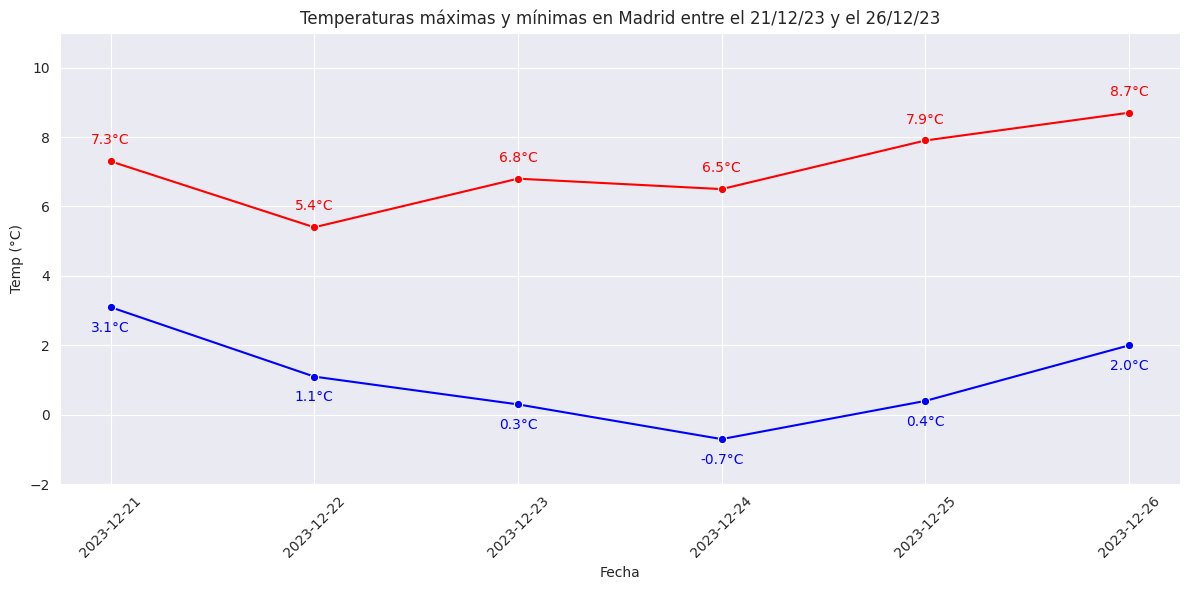

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes
maxT = dfMadridpronost['Temp Máxima (°C)']
minT = dfMadridpronost['Temp Mínima (°C)']
fechas = pd.to_datetime(dfMadridpronost['Fecha']).dt.strftime('%Y-%m-%d')  # Formatear las fechas sin hora

plt.figure(figsize=(12, 6))
sns.lineplot(data=dfMadridpronost, x=fechas, y=maxT, color='red', marker='o')
sns.lineplot(data=dfMadridpronost, x=fechas, y=minT, color='blue', marker='o')

plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Temp (°C)')
plt.title('Temperaturas máximas y mínimas en Madrid entre el 21/12/23 y el 26/12/23')
plt.ylim(-2, 11)

# Agregar etiquetas en cada punto de datos
label_offset = 0.4
for x, y, max_temp, min_temp in zip(fechas, maxT, maxT, minT):
    plt.text(x, y + label_offset, f'{max_temp}°C', ha='center', va='bottom', fontsize=10, color='red')
    plt.text(x, min_temp - label_offset, f'{min_temp}°C', ha='center', va='top', fontsize=10, color='blue')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Sistemas/CoderHouse - Data Science/TPintegrador/nuevo_desafio/temp_Navidad.jpg', format='jpeg', dpi=300)

plt.show()


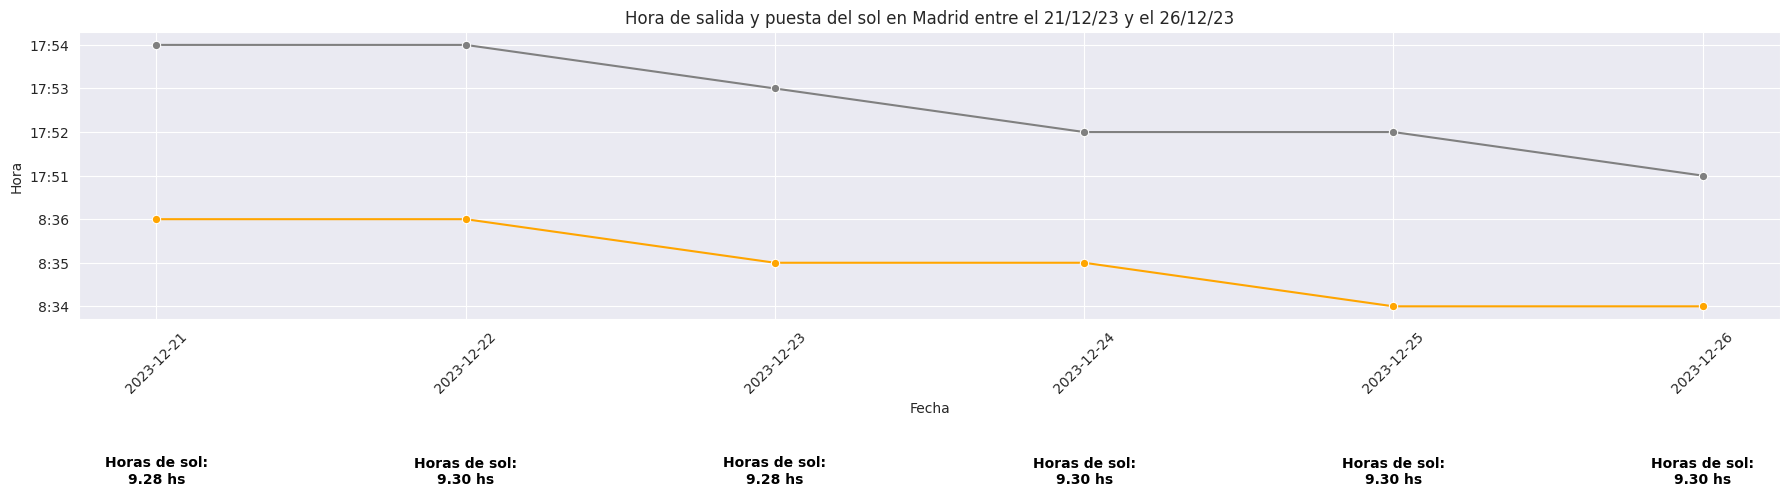

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amanH = dfMadridpronost['Amanecer']
ocasoH = dfMadridpronost['Ocaso']
duracion = dfMadridpronost['Duración']
fechas = pd.to_datetime(dfMadridpronost['Fecha']).dt.strftime('%Y-%m-%d')  # Formatear las fechas sin hora

e_aman = []
hora_aman = []

for i in amanH:
    e_aman.append(i.timetuple())

for f in e_aman:
    hora_aman.append(f'{f.tm_hour}:{f.tm_min}')

e_ocaso = []
hora_ocaso = []

for i in ocasoH:
    e_ocaso.append(i.timetuple())

for f in e_ocaso:
    hora_ocaso.append(f'{f.tm_hour}:{f.tm_min}')

plt.figure(figsize=(18, 6))
sns.lineplot(data=dfMadridpronost, x=fechas, y=hora_ocaso[::-1], color='grey', marker='o')
sns.lineplot(data=dfMadridpronost, x=fechas, y=hora_aman[::-1], color='orange', marker='o')

sns.set_style("darkgrid")

plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Hora')
plt.title('Hora de salida y puesta del sol en Madrid entre el 21/12/23 y el 26/12/23')

# Agrego etiquetas con la duración del día
for index, value in enumerate(duracion):
    plt.text(index, value + 0.5, f'Horas de sol:\n{value:.2f} hs', ha='center', va='center', color='black', fontweight='bold')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Sistemas/CoderHouse - Data Science/TPintegrador/nuevo_desafio/sol_Navidad.jpg', format='jpeg', dpi=300)

plt.show()


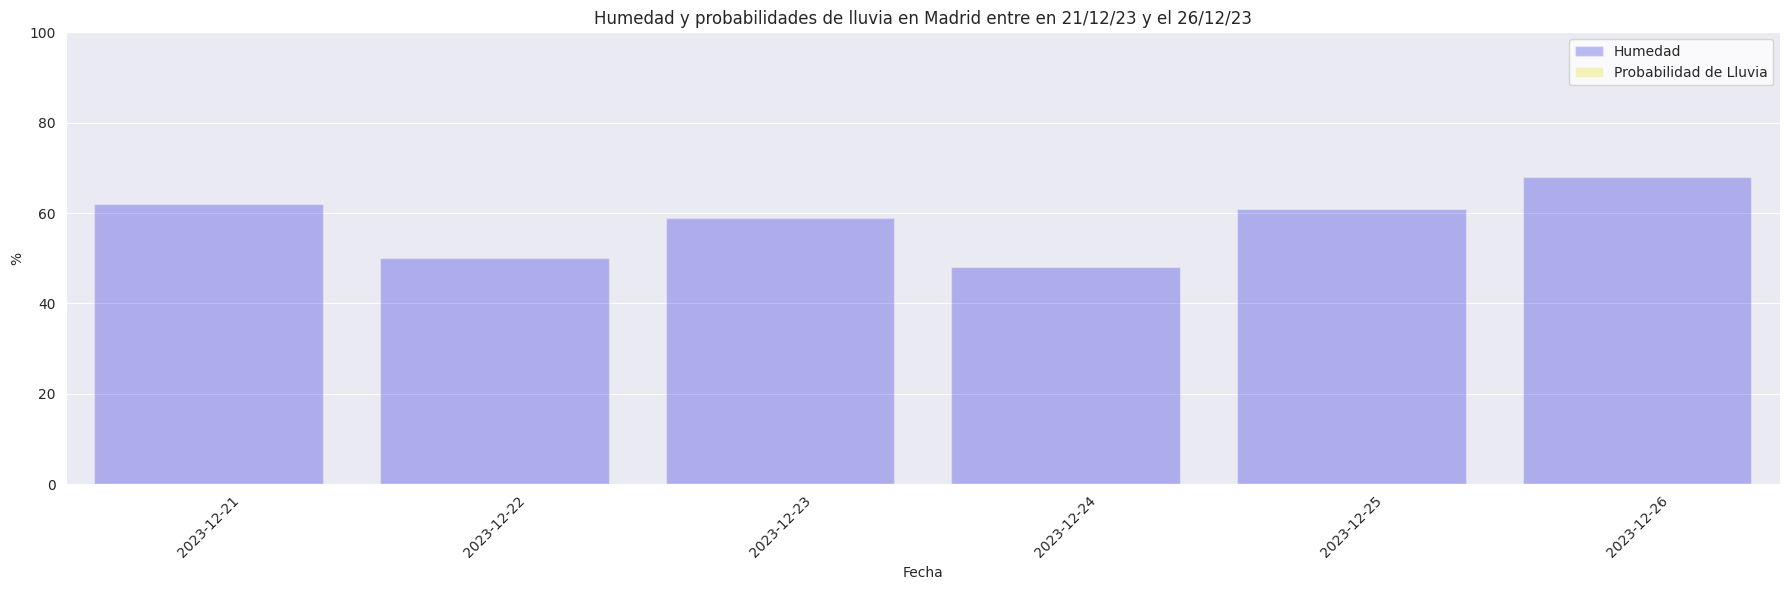

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

hum = dfMadridpronost['Humedad (%)']
lluvia = dfMadridpronost['Prob Lluvia (%)']

# Creo la lista de fechas en formato 'YYYY-MM-DD'
fechas = [str(date.date()) for date in dfMadridpronost['Fecha']]

plt.figure(figsize=(18, 6))

# Gráfico de barras de humedad
sns.barplot(data=dfMadridpronost, x=fechas, y=hum, color='blue', label='Humedad', alpha=0.3)

# Gráfico de barras de probabilidad de lluvia
sns.barplot(data=dfMadridpronost, x=fechas, y=lluvia, color='yellow', label='Probabilidad de Lluvia', alpha=0.3)

# Formato del fondo
sns.set_style("whitegrid")

# Personalización del gráfico
plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('%')
plt.title('Humedad y probabilidades de lluvia en Madrid entre en 21/12/23 y el 26/12/23')
plt.ylim(0, 100)

# Agregar leyenda para diferenciar las barras
plt.legend(loc='upper right')

plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Sistemas/CoderHouse - Data Science/TPintegrador/nuevo_desafio/humedad_Navidad.jpg', format='jpeg', dpi=300)

plt.show()